In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
url1 = "https://raw.githubusercontent.com/Group4-s2025/DATA6550-Visualization/refs/heads/main/Data/gender_submission.csv"
url2 = "https://raw.githubusercontent.com/Group4-s2025/DATA6550-Visualization/refs/heads/main/Data/test.csv"
url3 = "https://raw.githubusercontent.com/Group4-s2025/DATA6550-Visualization/refs/heads/main/Data/train.csv"
gender = pd.read_csv(url1)
test = pd.read_csv(url2)
train = pd.read_csv(url3)

In [3]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [4]:

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [5]:
# includes 'Survived' variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


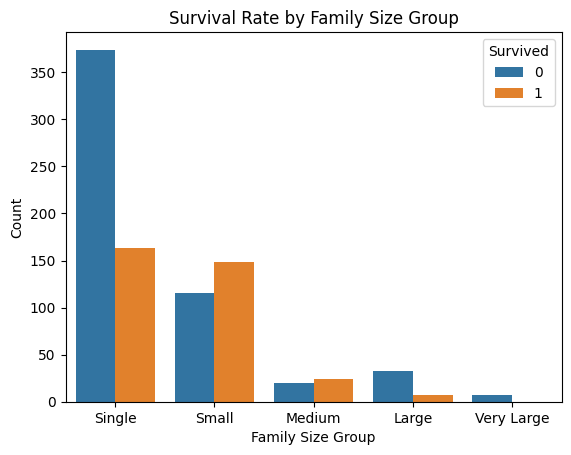

In [7]:
# Create Family Size groups with bins and labels
train['FamilySizeGroup'] = pd.cut(train['FamilySize'],
                                   bins=[0, 1, 3, 5, 10, 20],
                                   labels=['Single', 'Small', 'Medium', 'Large', 'Very Large'])

# Survival by Family Size Group
sns.countplot(x='FamilySizeGroup', hue='Survived', data=train)
plt.title('Survival Rate by Family Size Group')
plt.xlabel('Family Size Group')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

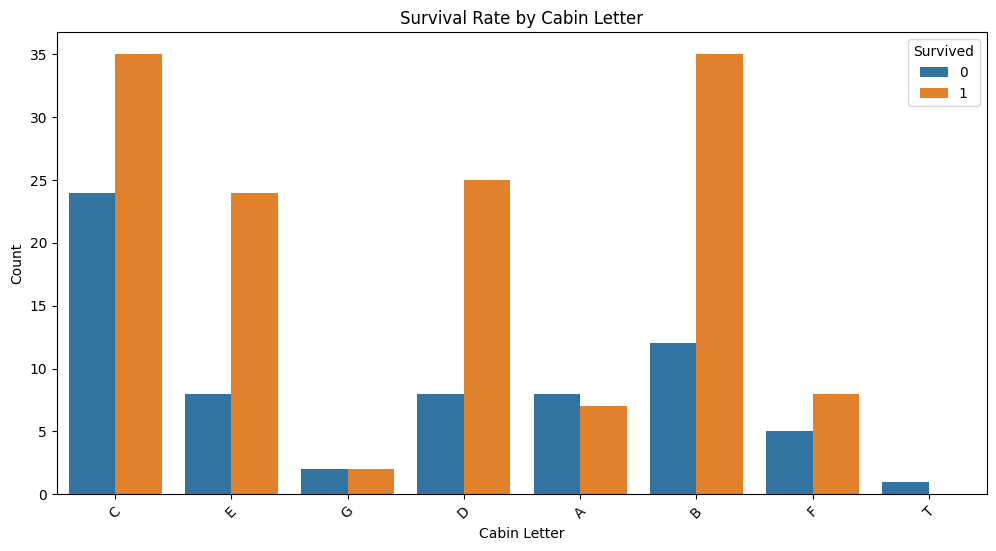

In [11]:
train['CabinLetter'] = train['Cabin'].str[0]

# Survival by Cabin Letter
plt.figure(figsize=(12, 6))
sns.countplot(x='CabinLetter', hue='Survived', data=train)
plt.title('Survival Rate by Cabin Letter')
plt.xlabel('Cabin Letter')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

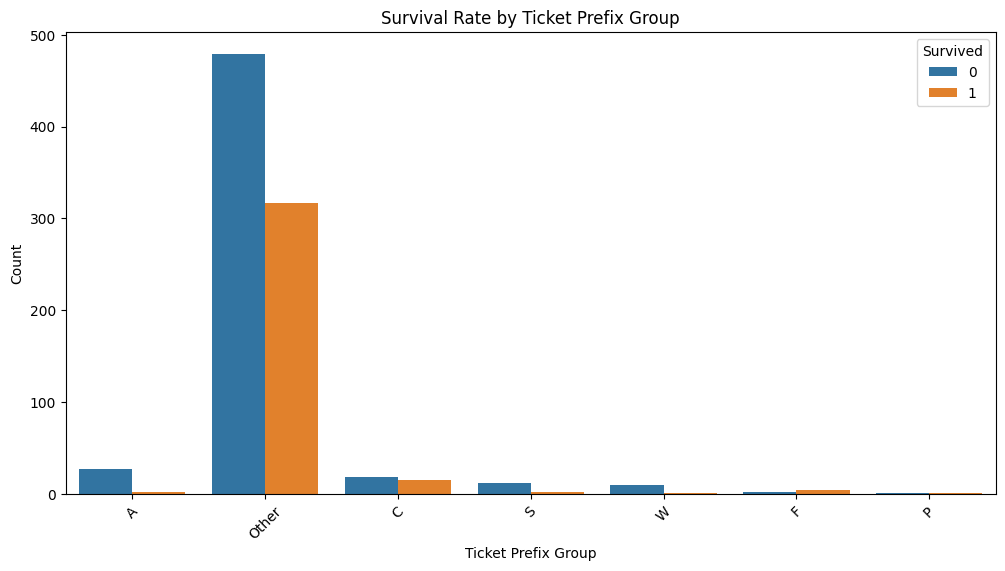

In [15]:
# Defining own categories based on the prefixes you find
ticket_mapping = {'A': 'A','B': 'B','C': 'C','D': 'D','E': 'E','F': 'F','G': 'G','L': 'L','P': 'P','S': 'S','W': 'W','T': 'T','C': 'C','Other': 'Other'}
                  # Grouping all other prefixes

# Mapping ticket prefixes to the new categories
train['TicketPrefixGroup'] = train['TicketPrefix'].map(ticket_mapping).fillna('Other')

# Survival by Ticket Prefix Group
plt.figure(figsize=(12, 6))
sns.countplot(x='TicketPrefixGroup', hue='Survived', data=train)
plt.title('Survival Rate by Ticket Prefix Group')
plt.xlabel('Ticket Prefix Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

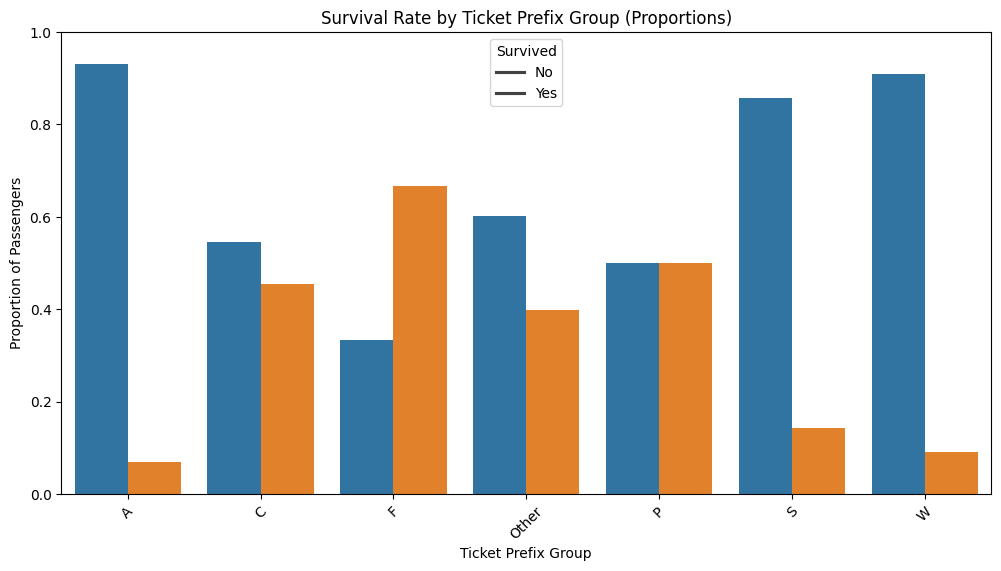

In [18]:
ticket_mapping = {'A': 'A','B': 'B','C': 'C','D': 'D','E': 'E','F': 'F','G': 'G','L': 'L','P': 'P','S': 'S','W': 'W','T': 'T','Other': 'Other'}

# Mapping ticket prefixes to the new categories
train['TicketPrefixGroup'] = train['TicketPrefix'].map(ticket_mapping).fillna('Other')

# Calculating proportions of survival by Ticket Prefix Group
survival_counts = train.groupby(['TicketPrefixGroup', 'Survived']).size().unstack(fill_value=0)
survival_proportions = survival_counts.div(survival_counts.sum(axis=1), axis=0)

# Reset index for plotting
survival_proportions = survival_proportions.reset_index()

# Melt the DataFrame for easier plotting
survival_proportions_melted = survival_proportions.melt(id_vars='TicketPrefixGroup', value_vars=[0, 1],
                                                         var_name='Survived', value_name='Proportion')

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x='TicketPrefixGroup', y='Proportion', hue='Survived', data=survival_proportions_melted)
plt.title('Survival Rate by Ticket Prefix Group (Proportions)')
plt.xlabel('Ticket Prefix Group')
plt.ylabel('Proportion of Passengers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for proportions
plt.show()

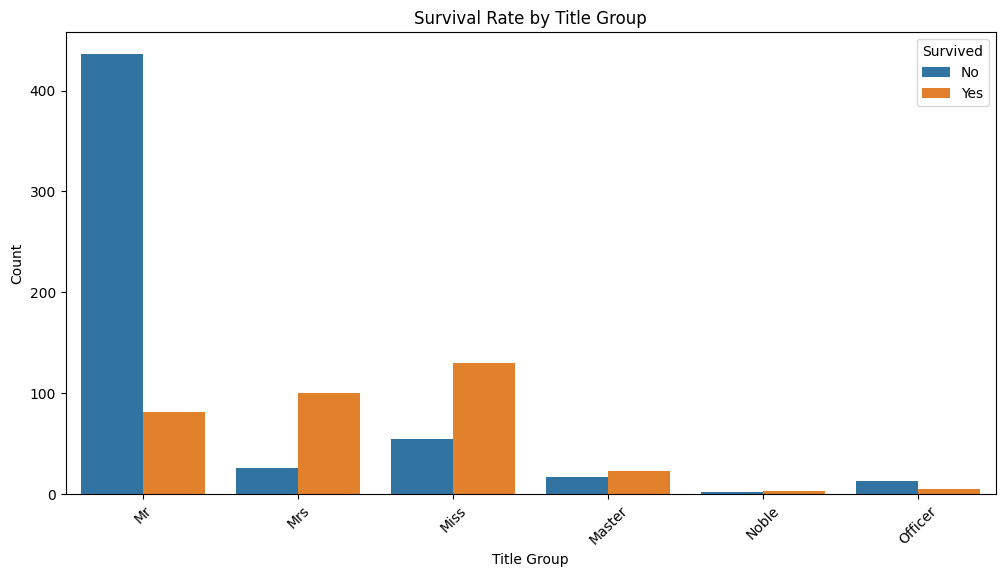

In [21]:
# Extract titles from the Name column
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group titles into broader categories
title_mapping = {'Mr': 'Mr','Mrs': 'Mrs','Miss': 'Miss','Ms': 'Miss', 'Master': 'Master','Dr': 'Officer','Rev': 'Officer','Col': 'Officer','Major': 'Officer',
    'Mlle': 'Miss','Mme': 'Mrs','Don': 'Noble','Lady': 'Noble','Sir': 'Noble','Jonkheer': 'Noble','Capt': 'Officer','Countess': 'Noble'}

# Map titles to the new categories
train['TitleGroup'] = train['Title'].map(title_mapping).fillna('Other')

# Survival by Title Group
plt.figure(figsize=(12, 6))
sns.countplot(x='TitleGroup', hue='Survived', data=train)
plt.title('Survival Rate by Title Group')
plt.xlabel('Title Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()